# Exploring the NP classifier chemical classes 

### Import modules

In [1]:
from io import StringIO
from collections import defaultdict
import pandas as pd
from tqdm import tqdm

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Taxonomy tree
from ete3 import NCBITaxa
from Bio import Phylo


In [2]:
mpl.rcParams['figure.dpi'] = 400
tqdm.pandas()
pd.set_option('display.max_columns', None)

In [3]:
DATA_DIR = '../data'

### Load NP classifier file

In [4]:
npclassifier_family_df = pd.read_parquet(f'{DATA_DIR}/np_classifier_family_vector.pq')
npclassifier_genus_df = pd.read_parquet(f'{DATA_DIR}/np_classifier_genus_vector.pq')


In [5]:
# Set plant name as index
npclassifier_genus_df.set_index('plant_name', inplace=True)
npclassifier_family_df.set_index('family', inplace=True)

In [6]:
if 'ftype' in npclassifier_family_df.columns:
    npclassifier_family_df.drop(columns=['ftype'], inplace=True)


if 'ftype' in npclassifier_genus_df.columns:
    npclassifier_genus_df.drop(columns=['ftype'], inplace=True)

In [7]:
# Merging the non-medicial and medicinal data
npclassifier_family_df = npclassifier_family_df.groupby(['family']).agg(sum)

In [8]:
npclassifier_family_df.shape, npclassifier_genus_df.shape

((208, 566), (17907, 566))

### Calculating no.of plants per class

In [9]:
npclassifier_genus_df = npclassifier_genus_df.T
npclassifier_family_df = npclassifier_family_df.T

In [10]:
family_class_score = pd.DataFrame(
    npclassifier_family_df.astype(bool).sum(axis=1), columns=['no.of.families']
).reset_index()
family_class_score.rename(columns={'index': 'class'}, inplace=True)
family_class_score.head(2)

class  no.of.families
0            Fatty acyl CoAs              32
1  Sativane sesquiterpenoids              12

In [11]:
family_class_score.sort_values(by='no.of.families', ascending=False, inplace=True)

In [12]:
genus_class_score = pd.DataFrame(
    npclassifier_genus_df.astype(bool).sum(axis=1), columns=['no.of.species']
).reset_index()
genus_class_score.rename(columns={'index': 'class'}, inplace=True)
genus_class_score.head(2)

class  no.of.species
0            Fatty acyl CoAs             93
1  Sativane sesquiterpenoids             24

In [13]:
genus_class_score.sort_values(by='no.of.species', ascending=False, inplace=True)

## Distribution of subselected classes

In [14]:
selected_classes = """Flavonols
Flavones
Oleanane triterpenoids
Simple coumarins
Acyclic monoterpenoids
Gallotannins
Lupane triterpenoids
Flavanones
Menthane monoterpenoids
Furofuranoid lignans
Neolignans
Isoquinoline alkaloids
Pyridine alkaloids
Anthraquinones and anthrones
Iridoids monoterpenoids
Simple indole alkaloids
Labdane diterpenoids
Kaurane and Phyllocladane diterpenoids
Isocoumarins
Quinoline alkaloids"""

In [15]:
family_class_score = family_class_score[family_class_score['class'].isin(selected_classes.split('\n'))]
len(family_class_score)

20

In [16]:
genus_class_score = genus_class_score[genus_class_score['class'].isin(selected_classes.split('\n'))]
len(genus_class_score)

20

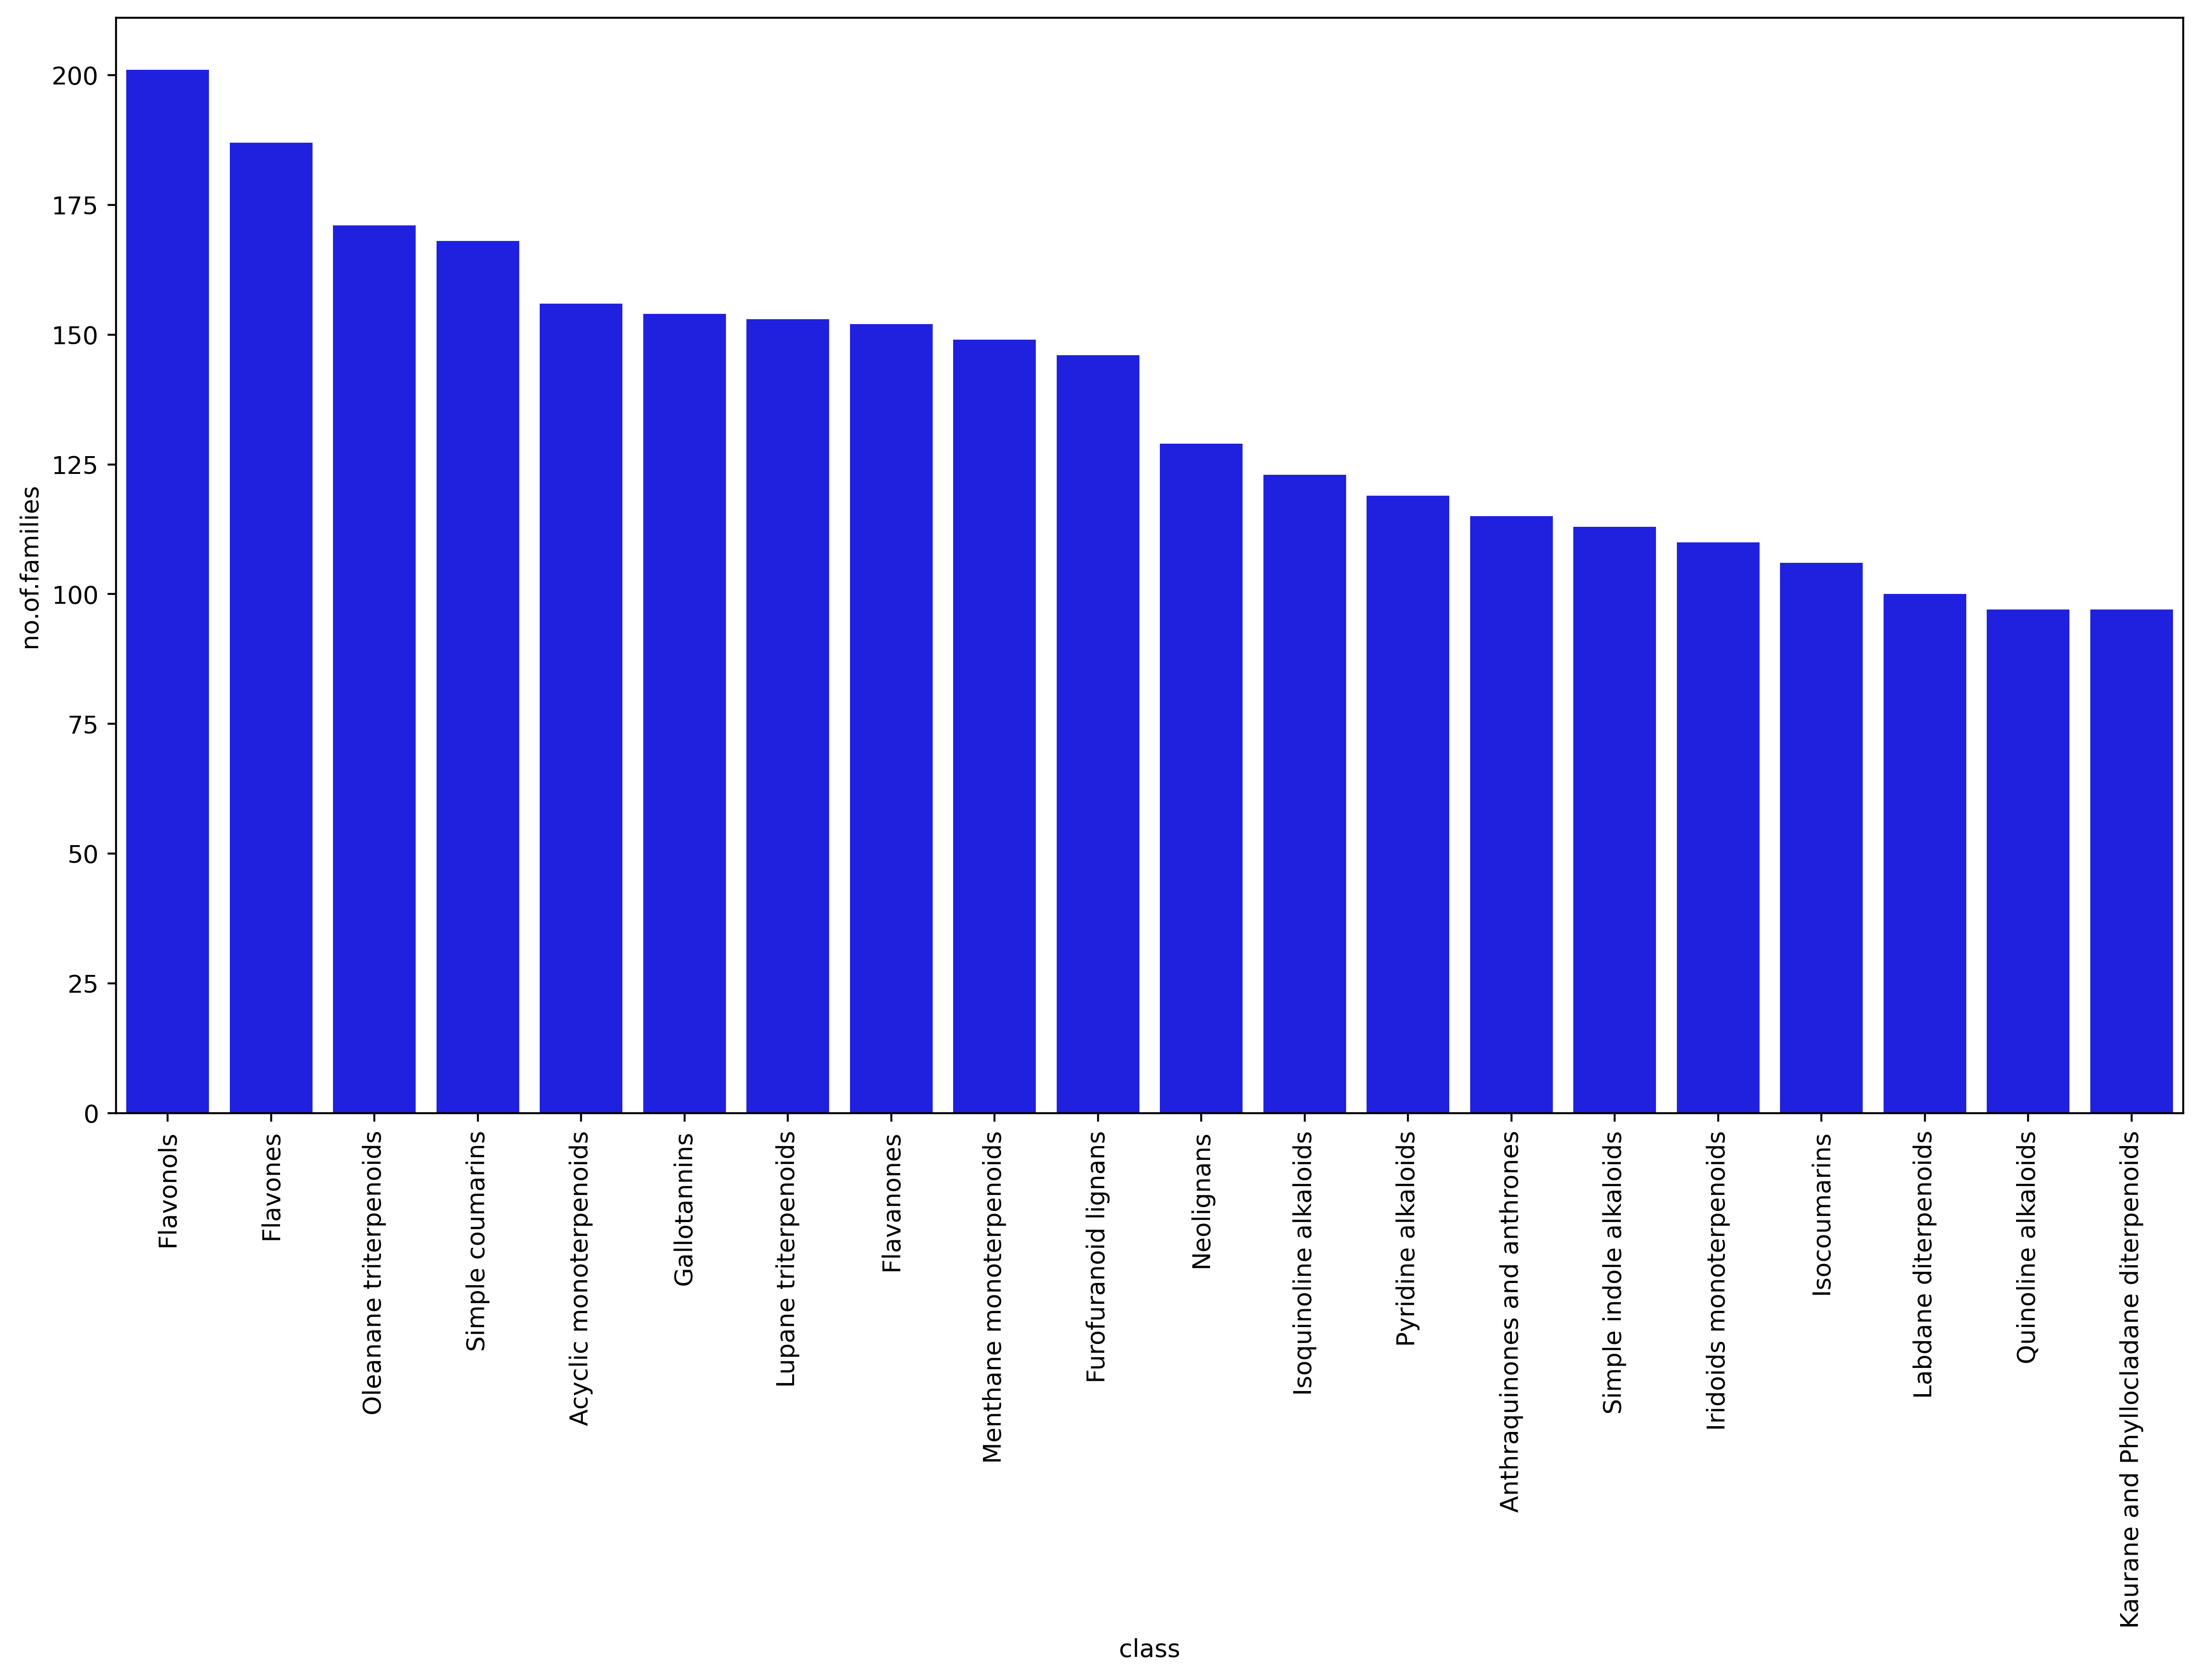

In [17]:
plt.figure(figsize=(15, 8))
sns.barplot(data=family_class_score, x='class', y='no.of.families', color='blue')
plt.xticks(rotation=90)
plt.show()

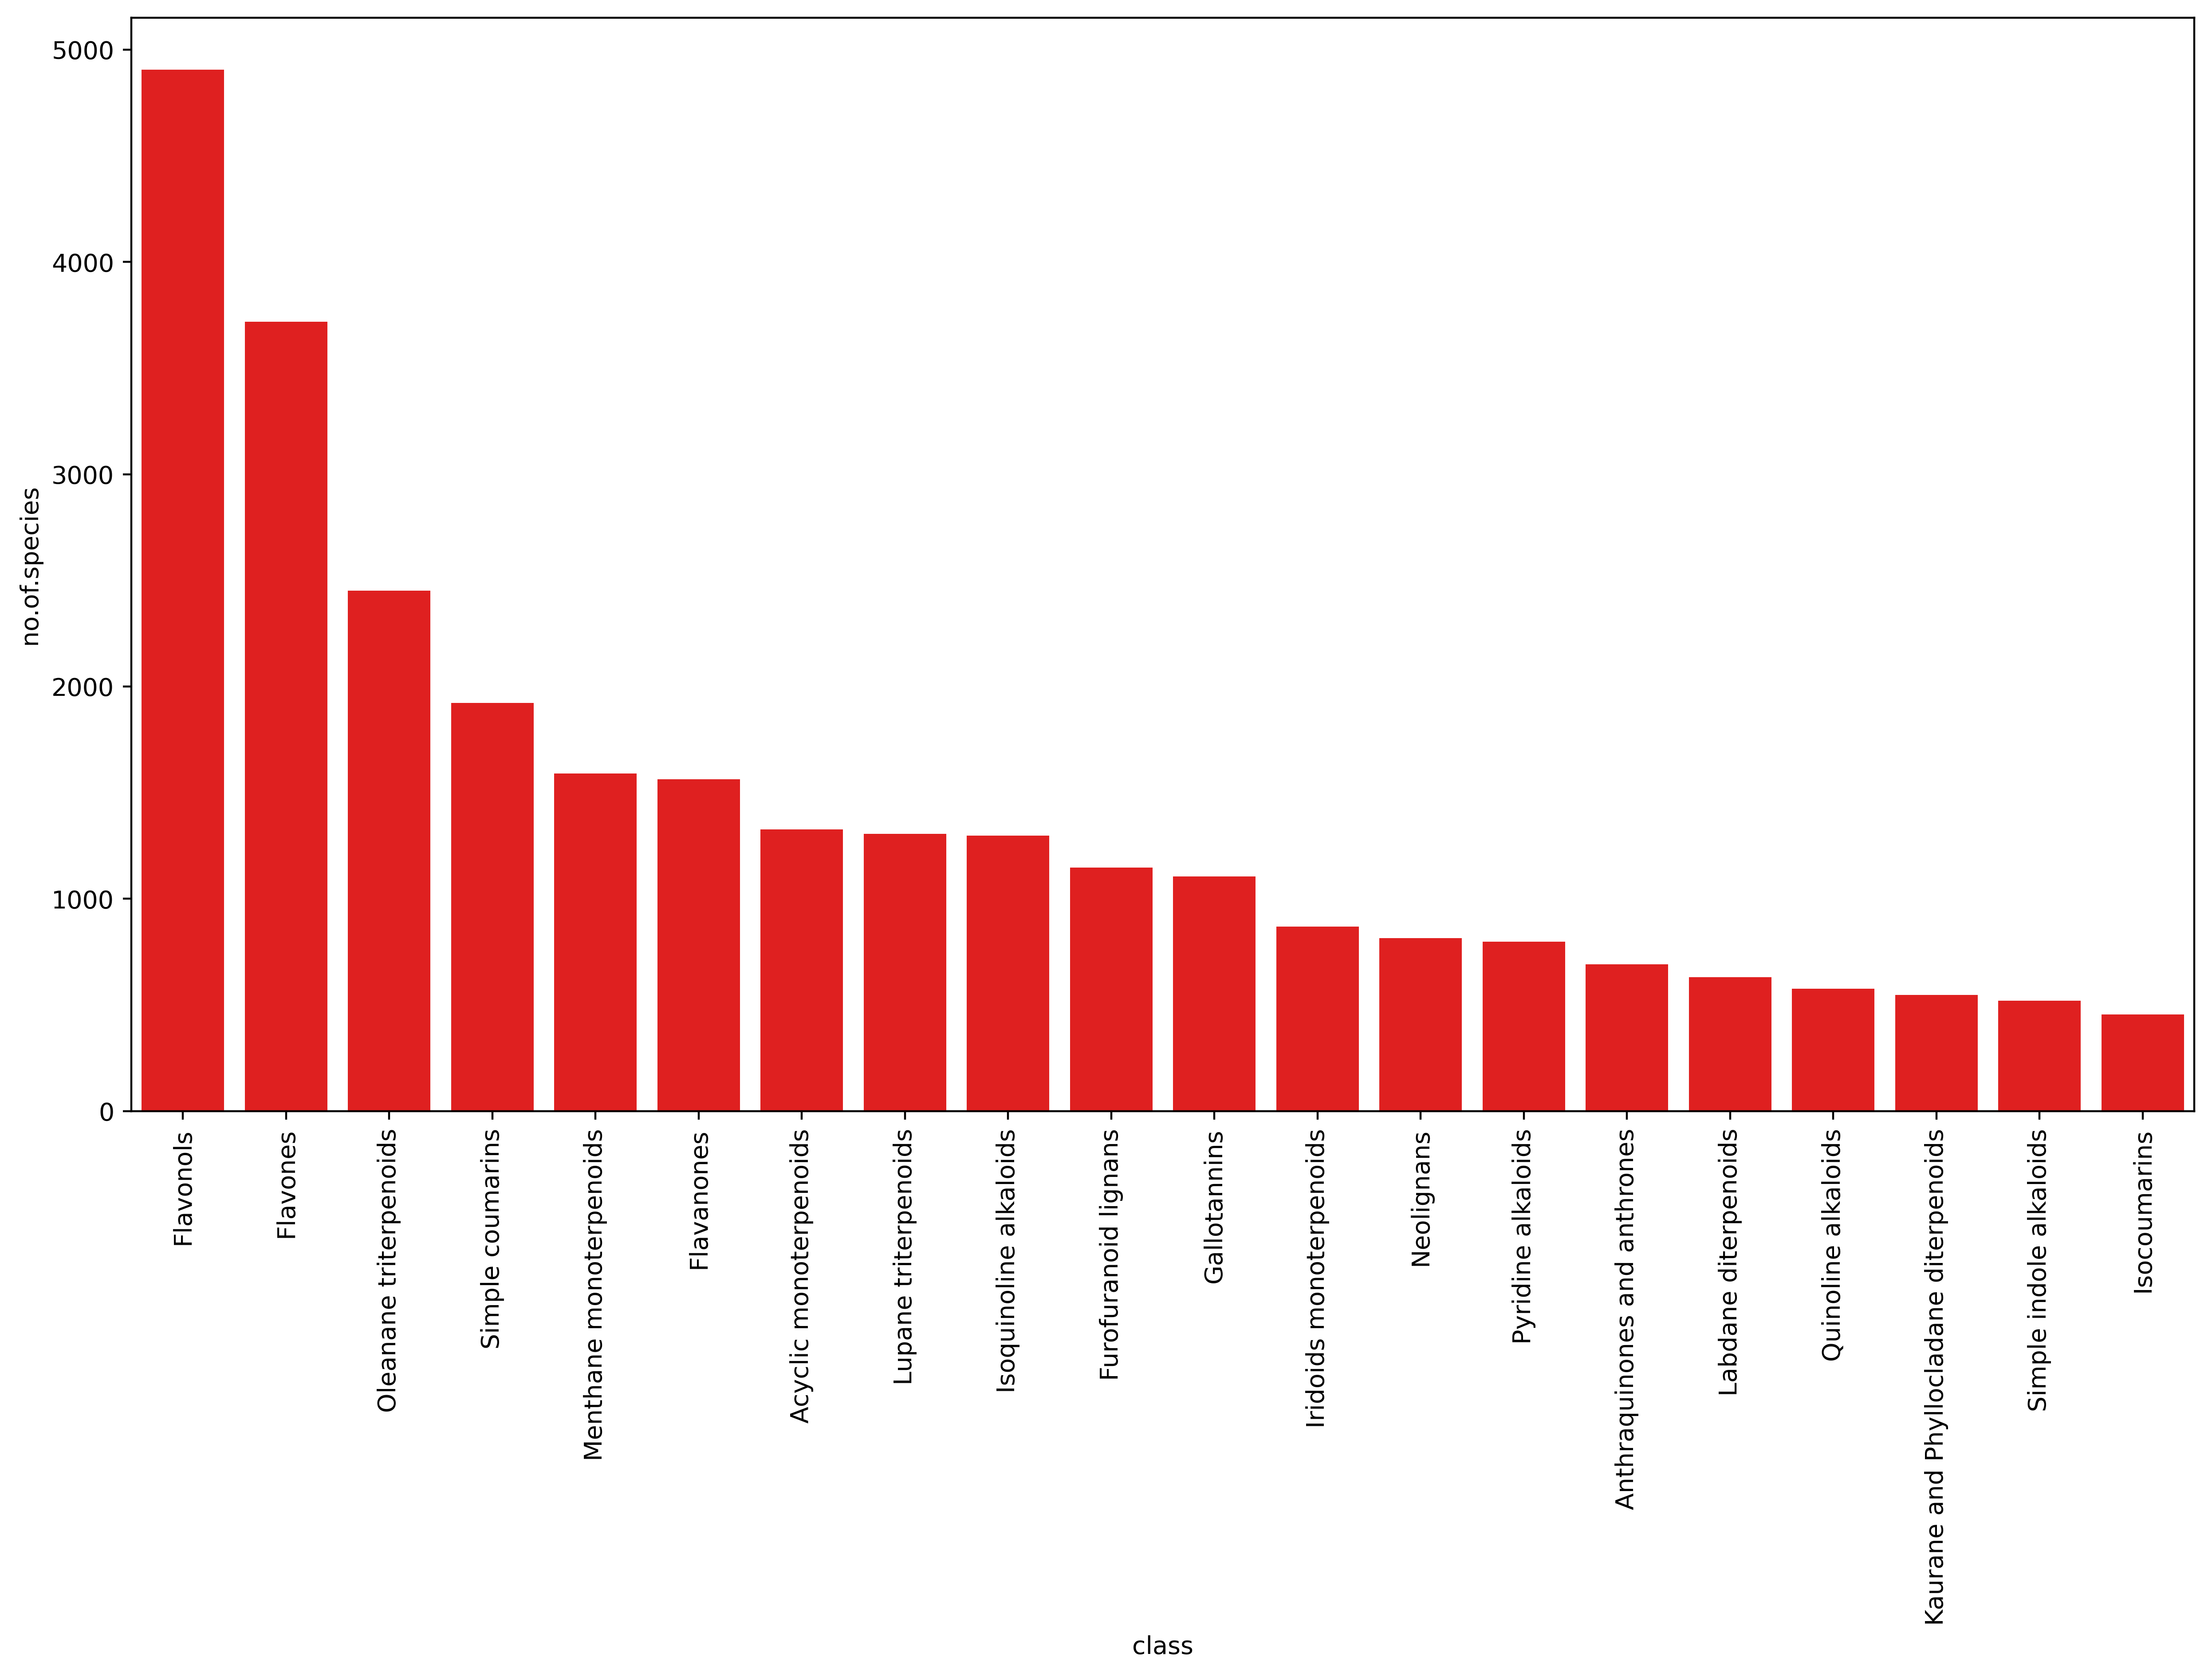

In [18]:
plt.figure(figsize=(15, 8))
sns.barplot(data=genus_class_score, x='class', y='no.of.species', color='red')
plt.xticks(rotation=90)
plt.show()

### Saving subselected class data

In [19]:
npclassifier_genus_df = npclassifier_genus_df.reset_index()
npclassifier_genus_df.rename(columns={'index': 'class_name'}, inplace=True)
npclassifier_genus_df.head(2)

plant_name                 class_name  ncbitaxon:1508571  ncbitaxon:409890  \
0                     Fatty acyl CoAs                  0                 0   
1           Sativane sesquiterpenoids                  0                 0   

plant_name  wfo:0000751569  wfo:0001094097  ncbitaxon:3079  ncbitaxon:1403486  \
0                        0               0               0                  0   
1                        0               0               0                  0   

plant_name  ncbitaxon:264924  ncbitaxon:478951  wfo:0000502737  \
0                          0                 0               0   
1                          0                 0               0   

plant_name  ncbitaxon:1514037  ncbitaxon:469930  wfo:0000199801  \
0                           0                 0               0   
1                           0                 0               0   

plant_name  ncbitaxon:79350  ncbitaxon:168576  ncbitaxon:1094039  \
0                         0                 0                  0   
1                         0                 0                  0   

plant_name  ncbitaxon:85269  ncbitaxon:1932724  ncbitaxon:2590717  \
0                         0                  0                  0   
1                         0                  0                  0   

plant_name  ncbitaxon:54782  ncbitaxon:306973  ncbitaxon:2067377  \
0                         0                 0                  0   
1                         0                 0                  0   

plant_name  ncbitaxon:151071  ncbitaxon:209610  ncbitaxon:70144  \
0                          0                 0                0   
1                          0                 0                0   

plant_name  ncbitaxon:171827  ncbitaxon:3673  ncbitaxon:157661  \
0                          0               0                 0   
1                          0               0                 0   

plant_name  ncbitaxon:81504  ncbitaxon:226895  ncbitaxon:384295  \
0                         0                 0                 0   
1                         0                 0                 0   

plant_name  ncbitaxon:29785  ncbitaxon:448267  ncbitaxon:1603710  \
0                         0                 0                  0   
1                         0                 0                  0   

plant_name  ncbitaxon:2067525  ncbitaxon:190524  ncbitaxon:262982  \
0                           0                 0                 0   
1                           0                 0                 0   

plant_name  ncbitaxon:1317686  ncbitaxon:1933536  ncbitaxon:358082  \
0                           0                  0                 0   
1                           0                  0                 0   

plant_name  ncbitaxon:185972  ncbitaxon:459596  ncbitaxon:29743  \
0                          0                 0                0   
1                          0                 0                0   

plant_name  ncbitaxon:1284852  ncbitaxon:166116  ncbitaxon:626680  \
0                           0                 0                 0   
1                           0                 0                 0   

plant_name  ncbitaxon:48924  ncbitaxon:125742  ncbitaxon:1569033  \
0                         0                 0                  0   
1                         0                 0                  0   

plant_name  ncbitaxon:375264  ncbitaxon:238491  ncbitaxon:382123  \
0                          0                 0                 0   
1                          0                 0                 0   

plant_name  ncbitaxon:74632  ncbitaxon:291098  ncbitaxon:39361  \
0                         0                 0                0   
1                         0                 0                0   

plant_name  ncbitaxon:588648  ncbitaxon:50240  ncbitaxon:1835414  \
0                          0                0                  0   
1                          0                0                  0   

plant_name  ncbitaxon:2026477  ncbitaxon:225785  nc

In [20]:
remove_cols = [
    col
    for col in npclassifier_genus_df.columns
    if not col.startswith('ncbitaxon') and col != 'class_name'
]
npclassifier_genus_df.drop(columns=remove_cols, inplace=True)
npclassifier_genus_df.shape

(566, 17347)

In [21]:
npclassifier_genus_df = npclassifier_genus_df[npclassifier_genus_df['class_name'].isin(selected_classes.split('\n'))]
len(npclassifier_genus_df)

20

In [22]:
npclassifier_genus_df.to_csv(f'{DATA_DIR}/subselected_genus_class.tsv', sep='\t', index=False)

### Generate taxonomy tree

In [23]:
ncbi = NCBITaxa()

In [24]:
all_plants = [
    col_name
    for col_name in npclassifier_genus_df
    if col_name.startswith('ncbitaxon')
]
len(all_plants)

17346

In [25]:
lineage_dict = defaultdict(dict)

for plant in tqdm(all_plants):
    plant = int(plant.split(':')[1])

    if plant == '':
        continue 

    tree = ncbi.get_lineage(plant)
    tree = [
        i
        for i in tree
        if i >= 33090 # Viridaeplante
    ]

    for idx in range(len(tree) - 1):
        
        parent = tree[idx]
        child = tree[idx + 1]
                             
        lineage_dict[parent][child] = idx + 1

  0%|          | 0/17346 [00:00<?, ?it/s]/Users/yojana/anaconda3/envs/plant_chem_space/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 746521 was translated into 2925009
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/Users/yojana/anaconda3/envs/plant_chem_space/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 2604645 was translated into 645710
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
  4%|▍         | 752/17346 [00:00<00:02, 7517.28it/s]/Users/yojana/anaconda3/envs/plant_chem_space/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 1249052 was translated into 2506376
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/Users/yojana/anaconda3/envs/plant_chem_space/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 118896 was translated 

In [26]:
def newickify(node_to_children, root_node) -> str:
    visited_nodes = set()

    def newick_render_node(name, distance: float) -> str:
        assert name not in visited_nodes, "Error: The tree may not be circular!"

        if name not in node_to_children:
            # Leafs
            return F'{name}:{distance}'
        else:
            # Nodes
            visited_nodes.add(name)
            children = node_to_children[name]
            children_strings = [newick_render_node(child, children[child]) for child in children.keys()]
            children_strings = ",".join(children_strings)
            return F'({children_strings}){name}:{distance}'

    newick_string = newick_render_node(root_node, 0) + ';'

    # Ensure no entries in the dictionary are left unused.
    assert visited_nodes == set(node_to_children.keys()), "Error: some nodes aren't in the tree"

    return newick_string

In [27]:
string = newickify(lineage_dict, root_node=131567)

In [28]:
biophylo_tree = Phylo.read(StringIO(string), "newick")

In [29]:
len([i for i in biophylo_tree.get_terminals()])

16336

In [30]:
Phylo.write(biophylo_tree, f'{DATA_DIR}/taxonomy_trees.nwk', "newick")

1